In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats

import dask.dataframe as dd
from pathlib import Path
import glob

import datetime as dt

import matplotlib.pyplot as plt
from matplotlib import colors
import soundfile as sf
import matplotlib.patches as patches

In [2]:
import sys

sys.path.append("../src")
sys.path.append("../src/activity")

In [3]:
import subsampling as ss
import activity.activity_assembly as actvt
from core import SITE_NAMES, FREQ_GROUPS

from cli import get_file_paths
import plot
import pipeline

In [4]:
avail = np.arange(0, 720, 6) + 6
reset_24 = avail[np.where((24*60 % avail) == 0)[0]]
reset_24

array([  6,  12,  18,  24,  30,  36,  48,  60,  72,  90,  96, 120, 144,
       180, 240, 288, 360, 480, 720])

Carp 


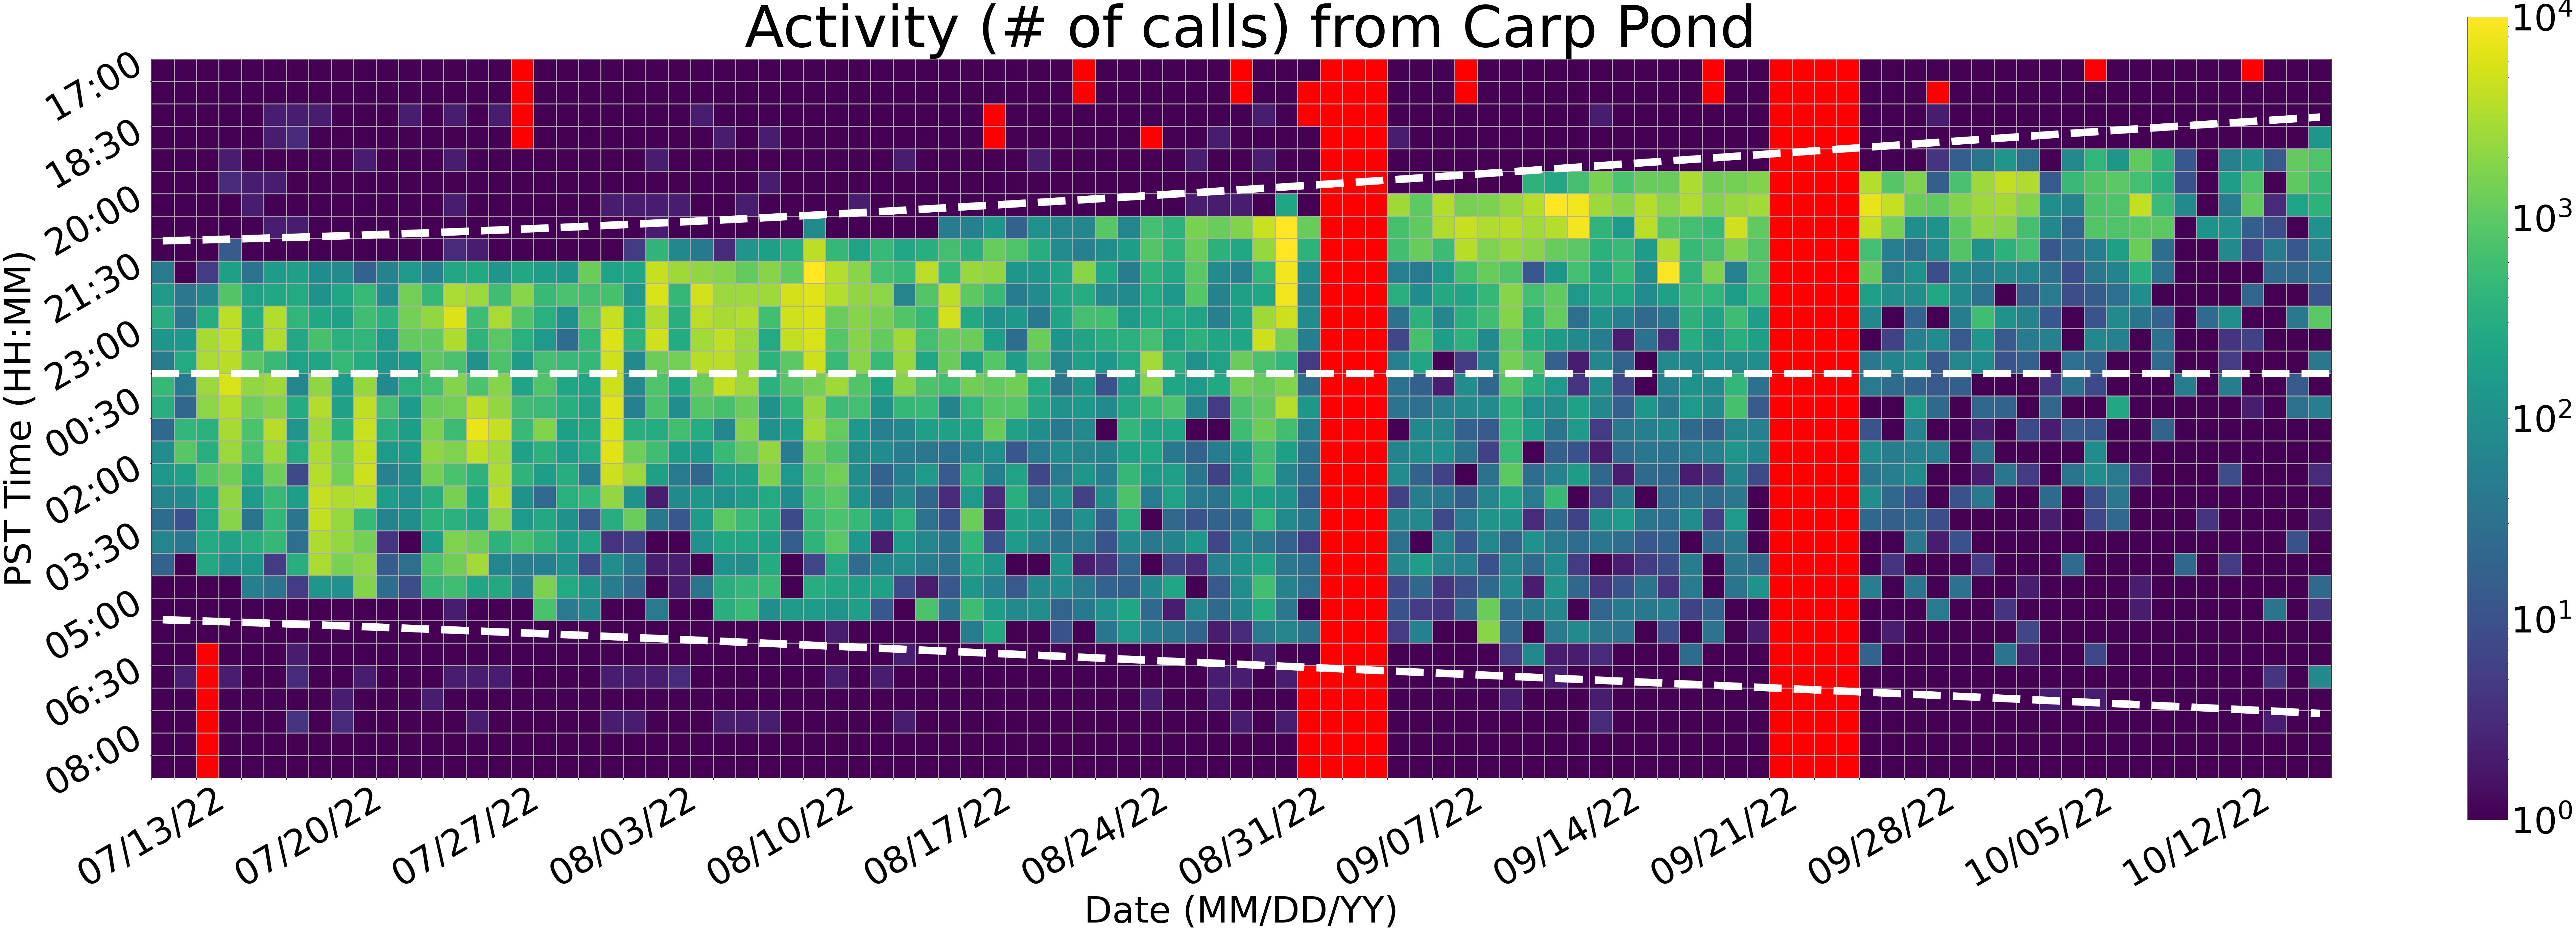

Carp LF


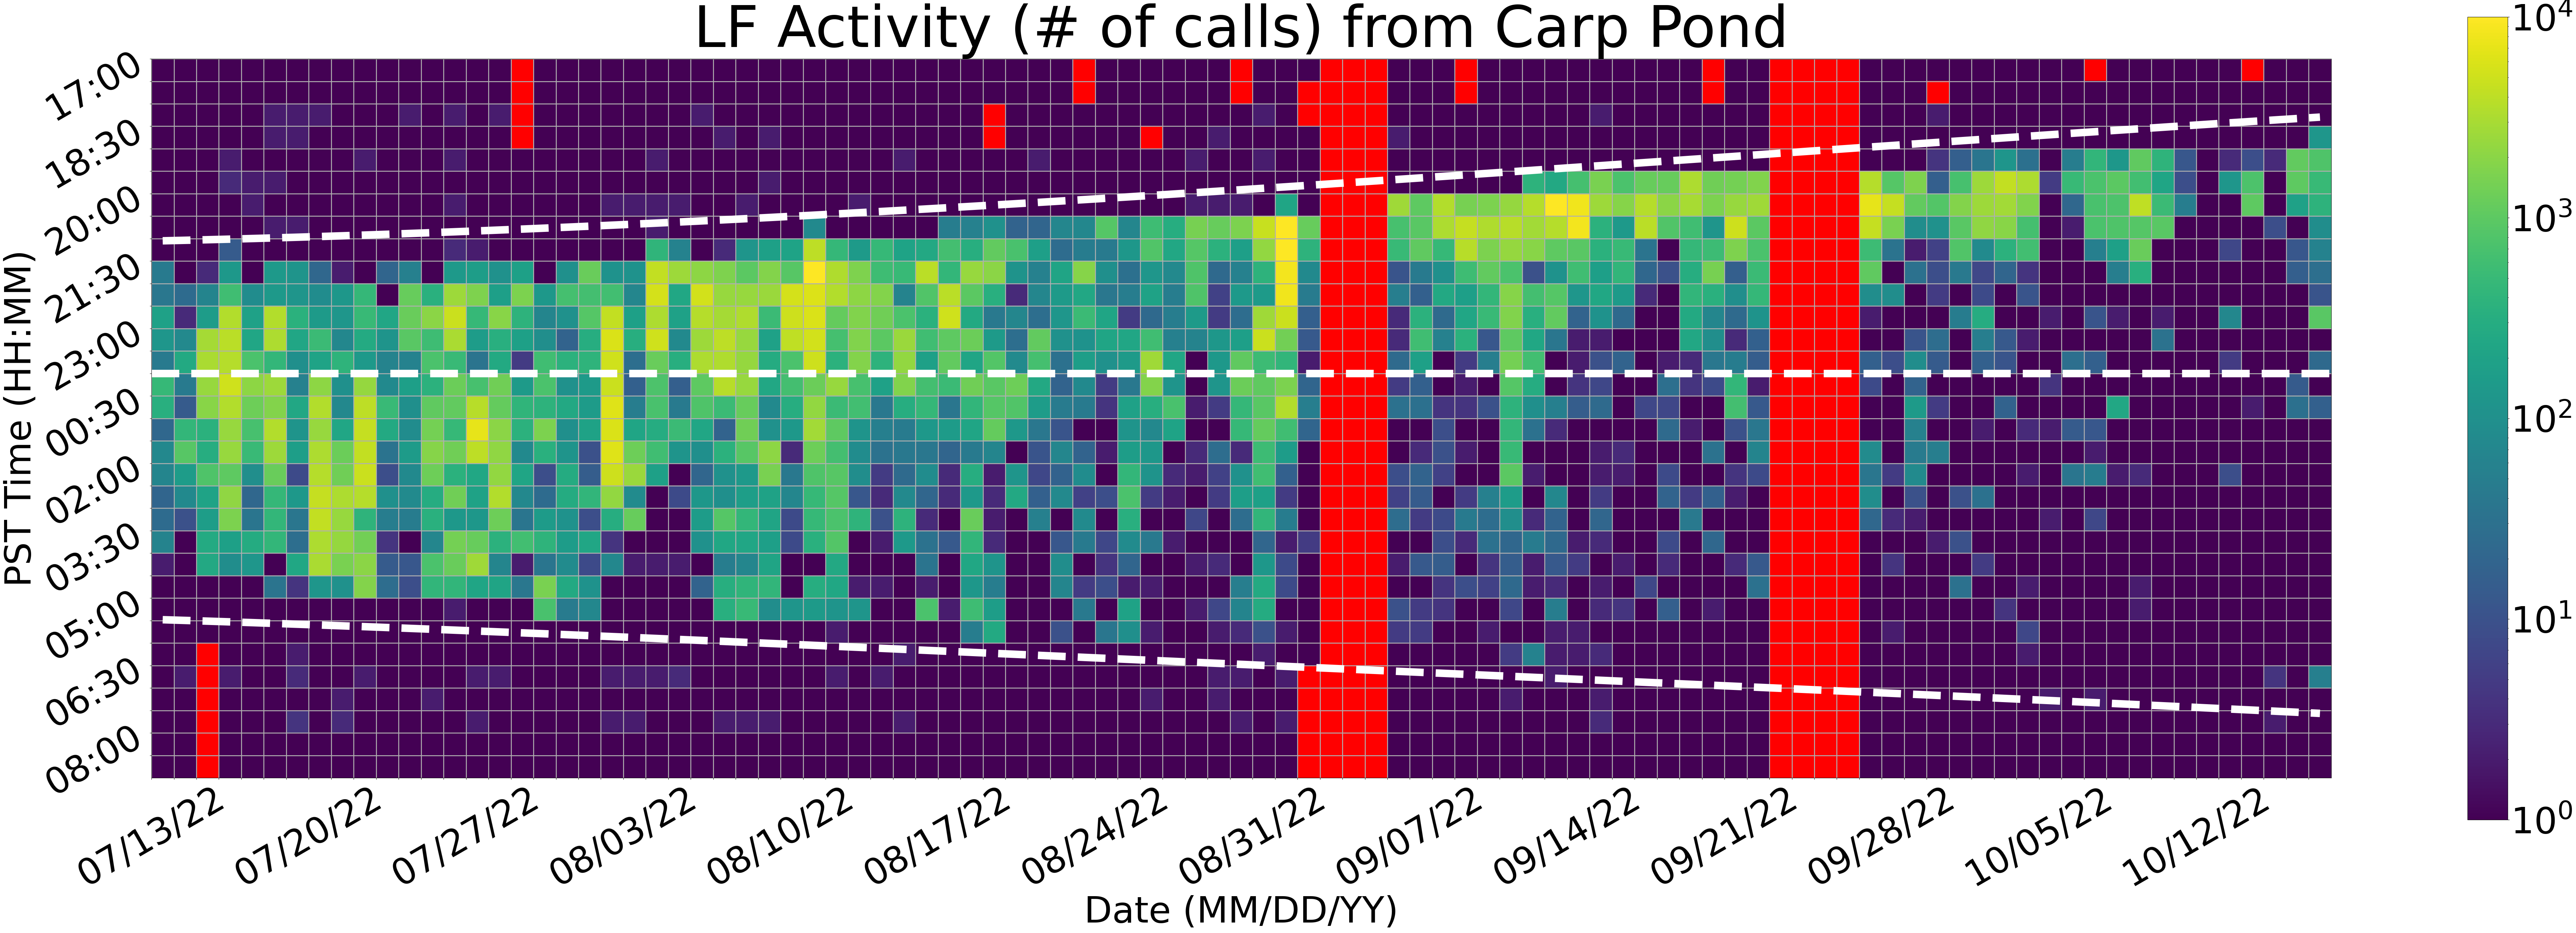

Carp HF


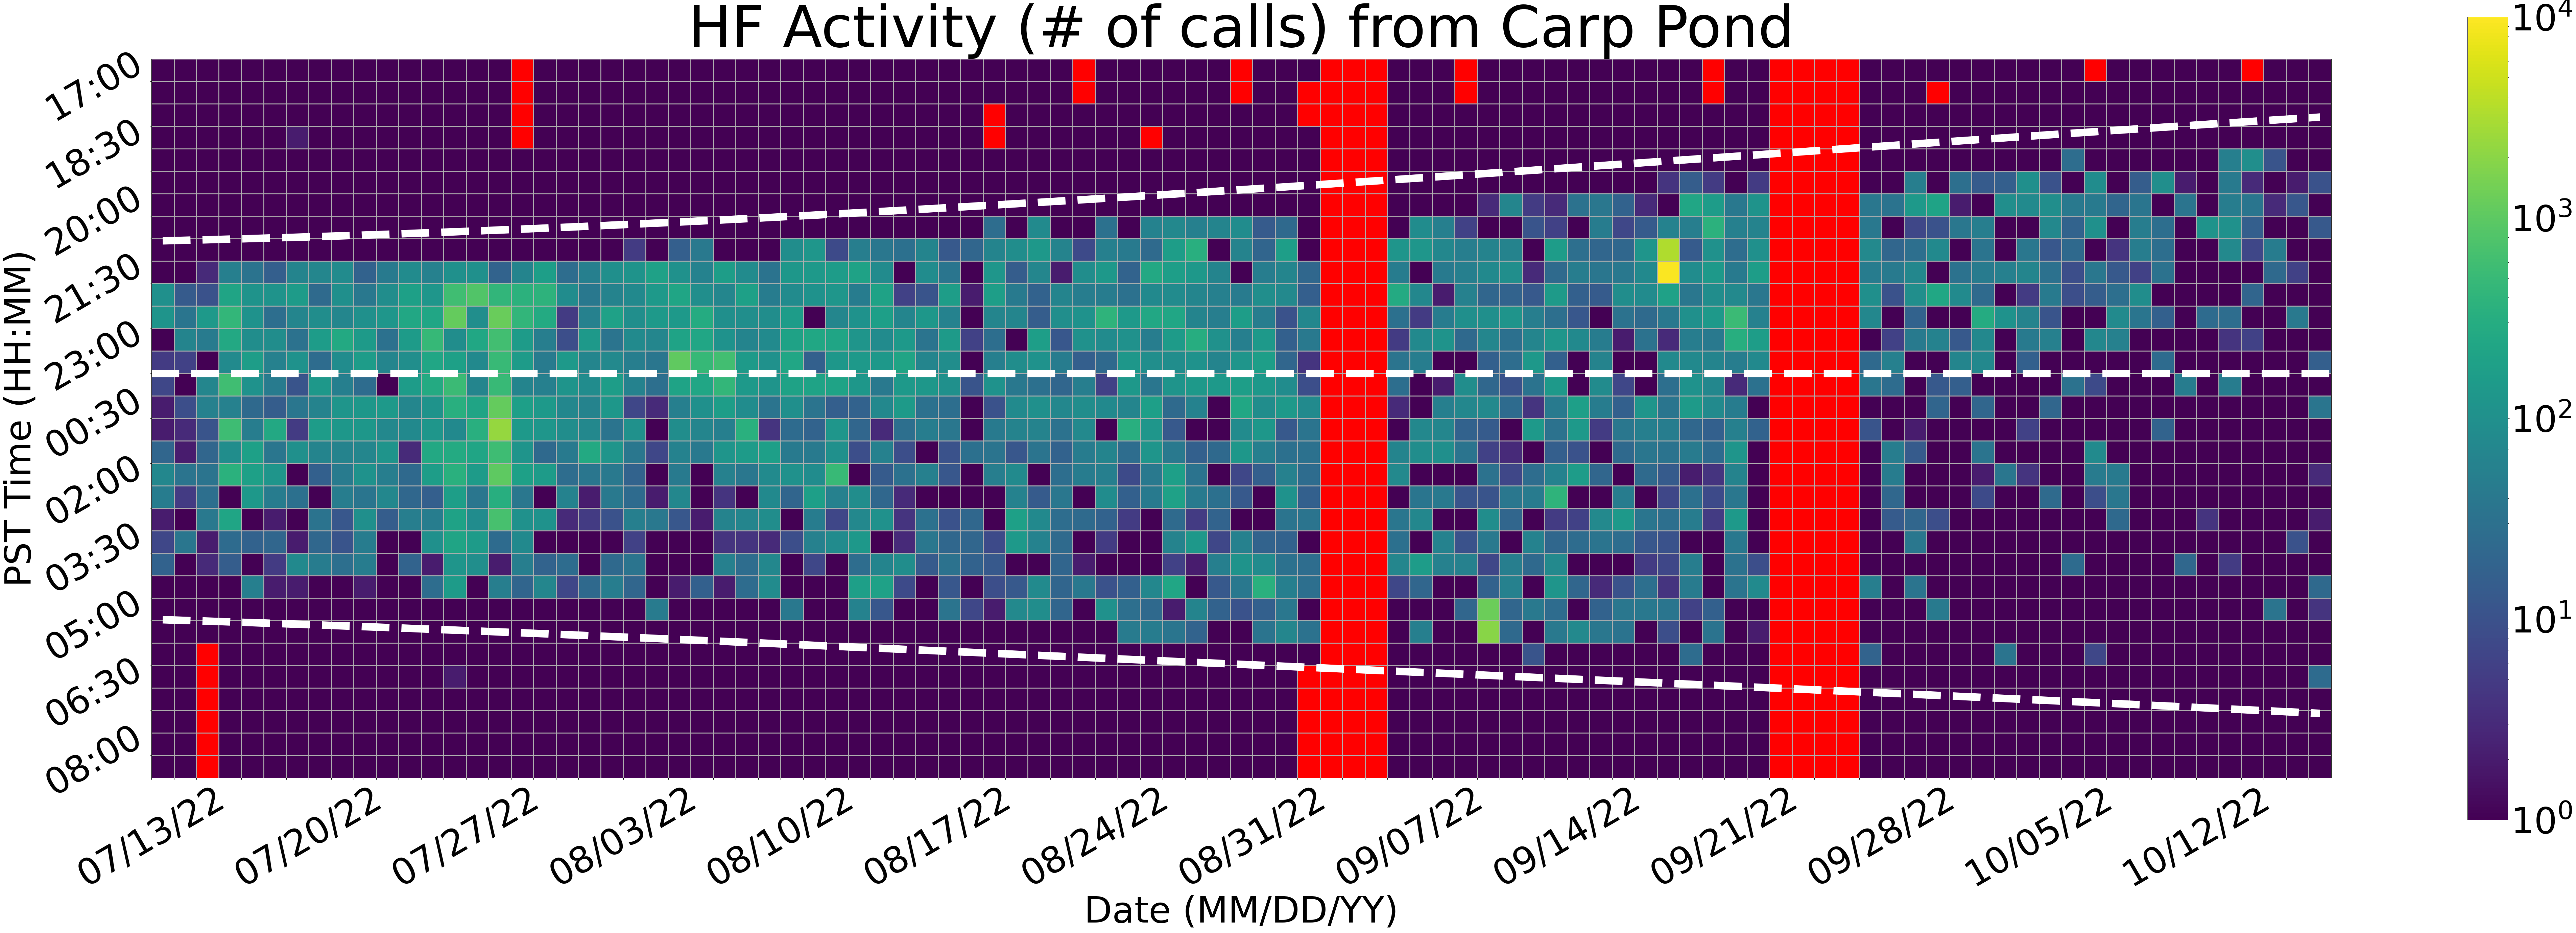

In [5]:
cycle_lengths = [10]
percent_ons = [1/2]
specific_dc_tag = "30of30"

data_params = dict()
data_params["cycle_lengths"] = cycle_lengths
data_params["percent_ons"] = percent_ons
dc_tags = ss.get_list_of_dc_tags(data_params["cycle_lengths"], data_params["percent_ons"])
data_params["dc_tags"] = dc_tags
data_params["cur_dc_tag"] = specific_dc_tag
data_params['bin_size'] = '30'
data_params['recording_start'] = '00:00'
data_params['recording_end'] = '16:00'

pipeline_params = dict()
pipeline_params['assemble_location_summary'] = False
pipeline_params["read_csv"] = True
pipeline_params['use_threshold_to_group'] = False
pipeline_params['use_kmeans_to_group'] = True
pipeline_params["save_activity_grid"] = False
pipeline_params["save_presence_grid"] = False
pipeline_params["save_dc_night_comparisons"] = False
pipeline_params["save_activity_dc_comparisons"] = True
pipeline_params["save_presence_dc_comparisons"] = True
pipeline_params["show_plots"] = True
pipeline_params["show_PST"] = True

site_keys = ['Carp']
for site_key in site_keys:
    for type_key in ['', 'LF', 'HF']:
        print(site_key, type_key)

        data_params["site_name"] = SITE_NAMES[site_key]
        data_params["site_tag"] = site_key
        data_params["type_tag"] = type_key

        file_paths = get_file_paths(data_params)

        activity_dets_arr = pipeline.run_for_dets(data_params, pipeline_params, file_paths)
        plot.plot_activity_grid_for_dets(activity_dets_arr, data_params, pipeline_params, file_paths)